In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
'''
    * Class to set sample data
    * Dosage is randomly generated values representing dosage of a drug
    * Cured means of that dosage was good enough to cure the pateint or not
    * PLEASE BE AWARE:
        * ALL VALUES ARE RANDOMLY GENERATED
        * THERE IS NO MERIT TO THIS DATA
        * IT IS PURELY BEING USED AS AN EXAMPLE FOR THE LINEAR SVM CLASSIFIER
'''
class SetData:
    def __init__(self):
        pass

    def setDataSet(self):
        data = {'Dosage': [1, 3, 10, 5, 7, 9, 6, 8, 5, 6],
        'Cured': ["no", "no", "no", "yes", "yes", "no", "yes", "no", "yes", "yes"]}
        df = pd.DataFrame(data)
        return df

In [3]:
'''
    * Class to perform Linear SVM
    * Class takes in a dataframe as parameter
'''
class LinearSVM:
    def __init__(self, df):
        self.df = df

    # This method maps the values in the dataframe that are of no and yes to the values of 0 and 1 respectively
    def map_classifiers(self):
        self.df["Cured"] = df["Cured"].replace({'no': 0, 'yes': 1})

    # This method is to set the X(input) and y(target) features
    def prep_features(self):
        X = self.df[["Dosage"]]
        y = self.df[["Cured"]]
        return X, y

    # scale the data - the type of scaler is passed in along with the input data
    def scale(self, _scaler, X):
        scaler = _scaler()
        X_scaled = scaler.fit_transform(X)
        return X_scaled

    # method for visualization, the model is passed in as a parameter
    def visualization(self,svm_model):
        # Prep the X feature
        X = self.df[['Dosage']]

        # Range of values for the decision boundary
        dosage_range = np.linspace(X['Dosage'].min(), X['Dosage'].max(), 100).reshape(-1, 1)
        decision_values = svm_model.decision_function(dosage_range)

        # Plotting data with decision boundary
        plt.figure(figsize=(10, 6))
        plt.scatter(self.df['Dosage'], self.df['Cured'], color='blue', label='Data Points')
        plt.plot(dosage_range, decision_values, color='red', label='Decision Function')
        plt.axhline(0, color='green', linestyle='--', label='Decision Boundary')
        plt.xlabel('Dosage')
        plt.ylabel('Cured (0 = no, 1 = yes)')
        plt.title('SVM Decision Boundary for Drug Dosage vs. Cure Status')
        plt.legend()
        plt.grid()
        plt.show()

    # Method to perform LinearSVM
    def performLienarSVM(self, target):
        # replace "no" and "yes" with 0 and 1 respectively
        self.map_classifiers()

        # set X and y features
        X, y = self.prep_features()

        # scale
        X_scaled = self.scale(StandardScaler, X)

        # Train the Linear SVM Model
        clf = SVC(kernel="linear", probability=True)
        clf.fit(X_scaled, y)

        # plot model
        self.visualization(clf)

In [4]:
# set dataframe
new_data = SetData()
df = new_data.setDataSet()

<ipython-input-3-4c36dd6df63b>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df["Cured"] = df["Cured"].replace({'no': 0, 'yes': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


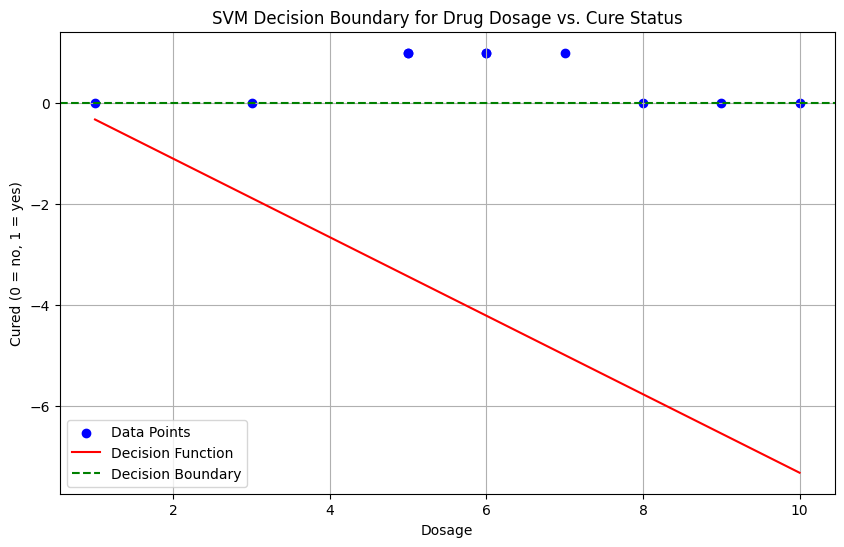

In [5]:
# new instance of the LinearSVM Class
linear_svm = LinearSVM(df)
linear_svm.performLienarSVM(target="Cured")